In [2]:
!pip install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 6.1 MB/s eta 0:00:00


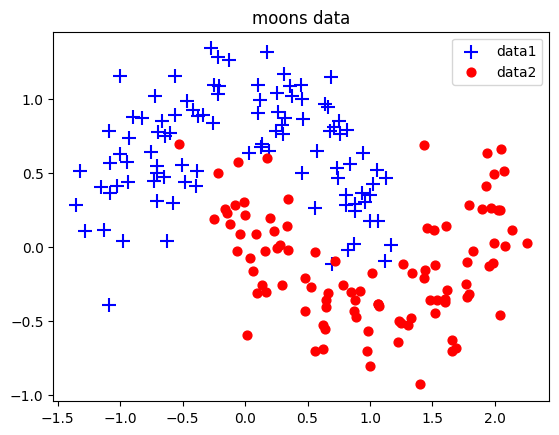

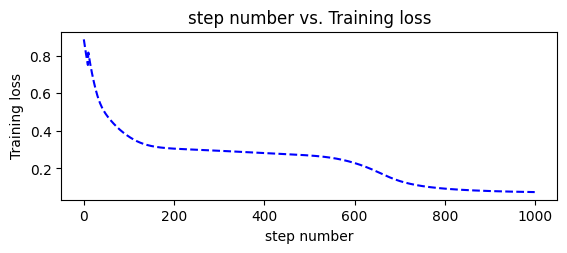

0.985


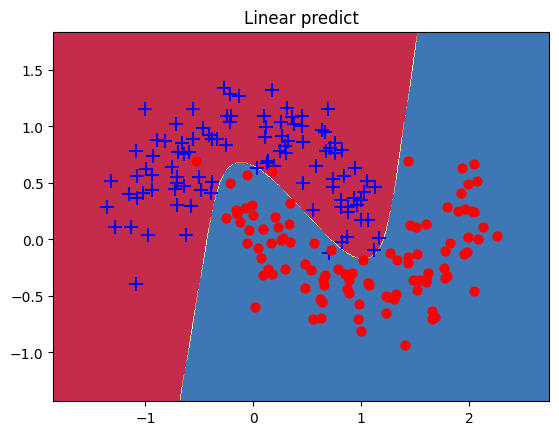

In [3]:
# -*- coding: utf-8 -*-
"""
@author: 代码医生工作室
@公众号：xiangyuejiqiren   （内有更多优秀文章及学习资料）
@来源: <PyTorch深度学习和图神经网络（卷 1）——基础知识>配套代码
@配套代码技术支持：bbs.aianaconda.com
Created on Fri Feb  1 00:07:25 2019
"""

import sklearn.datasets  #引入数据集
import torch
import numpy as np
import matplotlib.pyplot as plt
from code_02_moons_fun import LogicNet, plot_losses, predict, plot_decision_boundary

np.random.seed(0)  #设置随机数种子
X, Y = sklearn.datasets.make_moons(200, noise=0.2)  #生成2组半圆形数据

arg = np.squeeze(np.argwhere(Y == 0), axis=1)  #获取第1组数据索引
arg2 = np.squeeze(np.argwhere(Y == 1), axis=1)  #获取第2组数据索引

plt.title("moons data")
plt.scatter(X[arg, 0], X[arg, 1], s=100, c='b', marker='+', label='data1')
plt.scatter(X[arg2, 0], X[arg2, 1], s=40, c='r', marker='o', label='data2')
plt.legend()
plt.show()

model = LogicNet(inputdim=2, hiddendim=3, outputdim=2)  #初始化模型
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  #定义优化器

xt = torch.from_numpy(X).type(torch.FloatTensor)  #将Numpy数据转化为张量
yt = torch.from_numpy(Y).type(torch.LongTensor)
epochs = 1000  #定义迭代次数
losses = []  #定义列表，用于接收每一步的损失值
for i in range(epochs):
    loss = model.getloss(xt, yt)
    losses.append(loss.item())
    optimizer.zero_grad()  #清空之前的梯度
    loss.backward()  #反向传播损失值
    optimizer.step()  #更新参数

plot_losses(losses)

from sklearn.metrics import accuracy_score

print(accuracy_score(model.predict(xt), yt))

plot_decision_boundary(lambda x: predict(model, x), xt.numpy(), yt.numpy())








